In [1]:
import toolviper
ms_file = "uid___A002_Xced5df_Xf9d9.small.ms"
toolviper.utils.data.download(file=ms_file)

[2025-12-17 10:32:03,420]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List                      
 ─────────────────────────────────── 
  uid___A002_Xced5df_Xf9d9.small.ms

[2025-12-17 10:32:03,423]     INFO    viperlog:  File exists: uid___A002_Xced5df_Xf9d9.small.ms 


Output()

In [2]:
# Code to start a Dask cluster with two workers and 1 thread each.
from toolviper.dask.client import local_client

# viper_client = local_client(cores=2, memory_limit="4GB",autorestrictor=True)
viper_client = local_client(serial_execution=True)
viper_client

[2025-12-17 10:32:03,470]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2025-12-17 10:32:03,471]     INFO    viperlog:  Running client in synchronous mode. 


In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set
ps_store = ms_file.replace(".ms", ".ps.zarr")

convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=ps_store,
    parallel_mode="partition",
    overwrite=True,
)

[2025-12-17 10:32:04,798]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'EPHEMERIS_ID'] 
[2025-12-17 10:32:04,803]     INFO    viperlog:  Number of partitions: 20 
[2025-12-17 10:32:04,804]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [10], FIELD [1], SCAN [2, 4, 6, 8, 10, 12, 14, 16, 18], EPHEMERIS [-1] 
[2025-12-17 10:32:04,805]     INFO    viperlog:  OBSERVATION_ID [0], DDI [1], STATE [10], FIELD [1], SCAN [2, 4, 6, 8, 10, 12, 14, 16, 18], EPHEMERIS [-1] 
[2025-12-17 10:32:04,806]     INFO    viperlog:  OBSERVATION_ID [0], DDI [2], STATE [10], FIELD [1], SCAN [2, 4, 6, 8, 10, 12, 14, 16, 18], EPHEMERIS [-1] 
[2025-12-17 10:32:04,807]     INFO    viperlog:  OBSERVATION_ID [0], DDI [3], STATE [10], FIELD [1], SCAN [2, 4, 6, 8, 10, 12, 14, 16, 18], EPHEMERIS [-1] 
[2025-12-17 10:32:04,807]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [11], FIELD [1], SCAN [2, 4, 6, 8, 10, 12, 14, 16, 18], EPHEMERIS [-1] 
[

In [4]:
from xradio.measurement_set import open_processing_set

import pandas as pd
pd.set_option('display.max_colwidth', 1000)

ps_xdt = open_processing_set(ps_store)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,uid___A002_Xced5df_Xf9d9.small_00,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.295643e+11,2.295648e+11
1,uid___A002_Xced5df_Xf9d9.small_01,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.320078e+11,2.320390e+11
2,uid___A002_Xced5df_Xf9d9.small_02,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_3#SW-01#FULL_RES_2,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[H2CO_Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.161367e+11,2.161406e+11
3,uid___A002_Xced5df_Xf9d9.small_03,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_4#SW-01#FULL_RES_3,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[C18O_2_1(ID=3768339)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.179697e+11,2.179736e+11
4,uid___A002_Xced5df_Xf9d9.small_04,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.295643e+11,2.295648e+11
5,uid___A002_Xced5df_Xf9d9.small_05,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.320078e+11,2.320390e+11
6,uid___A002_Xced5df_Xf9d9.small_06,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_3#SW-01#FULL_RES_2,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[H2CO_Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.161367e+11,2.161406e+11
7,uid___A002_Xced5df_Xf9d9.small_07,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_4#SW-01#FULL_RES_3,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[C18O_2_1(ID=3768339)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.179697e+11,2.179736e+11
8,uid___A002_Xced5df_Xf9d9.small_08,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[UNSPECIFIED],[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",---,uid://A001/X1284/X2621,uid://A001/X1221/Xa61,2.295643e+11,2.295648e+11
9,uid___A002_Xced5df_Xf9d9.small_09,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)",uid://A002/Xced5df/Xf9d9,"[XX, YY]","[10, 12, 14, 16, 18, 2, 4, 6, 8]",X1204293883#AL

In [5]:
ps_xdt.xr_ps.get_combined_antenna_xds()

<xarray.Dataset> Size: 73kB
Dimensions:                 (antenna_name: 2, cartesian_pos_label: 3,
                             receptor_label: 2, frequency: 12, polarization: 2,
                             time: 9099)
Coordinates:
  * antenna_name            (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
  * frequency               (frequency) float64 96B 2.161e+11 ... 2.32e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
  * time                    (time) float64 73kB 1.53e+09 1.53e+09 ... 1.53e+09
    mount                   (antenna_name) <U6 48B dask.array<chunksize=(2,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 16B dask.array<chunksize=(2, 2), meta=np.ndarray>
    station_name            (antenna_name) <U4 32B dask.array<chunksize=(2,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 32B dask.array<chunksize=(2,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 32B dask.array<chunksize=(2, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  ALMA
    relocatable_antennas:    True
    type:                    antenna

In [6]:
from graphviper.graph_tools.coordinate_utils import (
    interpolate_data_coords_onto_parallel_coords, make_parallel_coord
)

from graphviper.graph_tools.coordinate_utils import make_frequency_coord

from toolviper.utils.display import dict_to_html
from IPython.display import HTML, display


parallel_coords ={}
coord = ps_xdt.xr_ps.get_combined_antenna_xds().antenna_name
n_chunks = len(coord)
parallel_coords["antenna_name"] = make_parallel_coord(coord=coord, n_chunks=n_chunks)
print("Parallel Coordinates - Antenna Name:")
display(HTML(dict_to_html(parallel_coords["antenna_name"])))

node_task_data_mapping = interpolate_data_coords_onto_parallel_coords(
    parallel_coords, ps_xdt
)

print("Node Task Data Mapping:")
display(HTML(dict_to_html(node_task_data_mapping)))

Parallel Coordinates - Antenna Name:


Node Task Data Mapping:


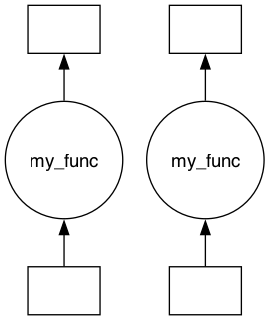

In [7]:
import dask
from graphviper.graph_tools.map import map
from graphviper.graph_tools.generate_dask_workflow import generate_dask_workflow

from toolviper.utils.display import dict_to_html

from IPython.display import display, HTML


def my_func(input_params):
    display(HTML(dict_to_html(input_params)))

    print("*" * 30)
    return input_params["test_input"]


input_params = {}
input_params["test_input"] = 42

viper_graph = map(
    input_data=ps_xdt,
    node_task_data_mapping=node_task_data_mapping,
    node_task=my_func,
    input_params=input_params,
)

dask_graph = generate_dask_workflow(viper_graph)
dask.visualize(dask_graph, filename="map_graph")

In [8]:
dask.compute(dask_graph)

******************************


******************************


([42, 42],)